Customer Churn Analysis
Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

Note: You can find the dataset in the link below.

Downlaod Files:
https://github.com/dsrscientist/DSData/blob/master/Telecom_customer_churn.csv

In [1]:
# importing the module which is required to read the file
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Telecom_customer_churn.csv') # Reading the file

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Checking null values in the dataframe

In [4]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
data.shape

(7043, 21)

In [7]:
data['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [8]:
data['TotalCharges'].nunique()

6531

In [9]:
data.loc[data['TotalCharges'] == " "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


After some observationss, we saw that some columns have space as the value

In [10]:
data["TotalCharges"] = data["TotalCharges"].replace(" ",np.nan)

Converting the column type from object to float

In [11]:
data["TotalCharges"] = data["TotalCharges"].astype(float)

In [12]:
np.mean(data["TotalCharges"])

2283.3004408418697

In [13]:
data["TotalCharges"] = data["TotalCharges"].fillna(np.mean(data["TotalCharges"]))

In [14]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### Making DataFrame for the Nominal Data

In [15]:
data_visualization_nominal = data[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']].copy()

In [16]:
data_visualization_nominal.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [17]:
len(data.columns)

21

In [18]:
len(data_visualization_nominal.columns)

17

Visualization of the Data:

For the nominal categorical data we will use countplot as it will give the frequency of the classes of the columns:

In [19]:
import seaborn as sns

Male      3555
Female    3488
Name: gender, dtype: int64


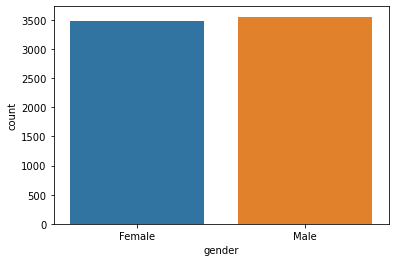

In [20]:
ax = sns.countplot(x="gender", data=data_visualization_nominal)
print(data_visualization_nominal["gender"].value_counts())

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


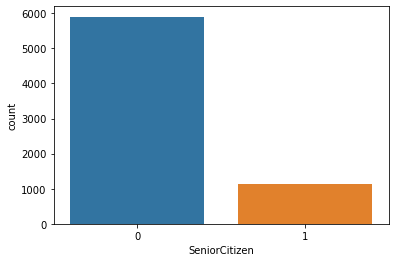

In [21]:
ax = sns.countplot(x="SeniorCitizen", data=data_visualization_nominal)
print(data_visualization_nominal["SeniorCitizen"].value_counts())

No     3641
Yes    3402
Name: Partner, dtype: int64


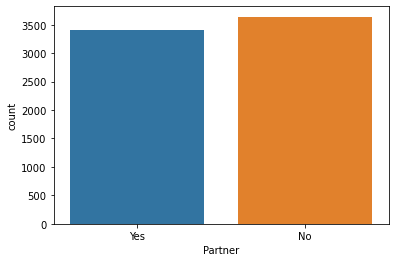

In [22]:
ax = sns.countplot(x="Partner", data=data_visualization_nominal)
print(data_visualization_nominal["Partner"].value_counts())

No     4933
Yes    2110
Name: Dependents, dtype: int64


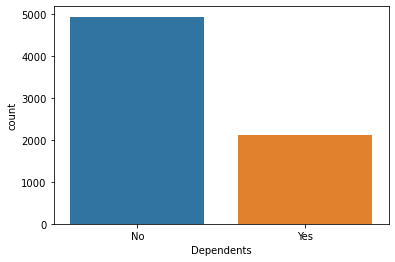

In [23]:
ax = sns.countplot(x="Dependents", data=data_visualization_nominal)
print(data_visualization_nominal["Dependents"].value_counts())

Yes    6361
No      682
Name: PhoneService, dtype: int64


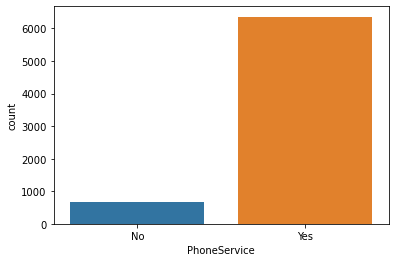

In [24]:
ax = sns.countplot(x="PhoneService", data=data_visualization_nominal)
print(data_visualization_nominal["PhoneService"].value_counts())

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


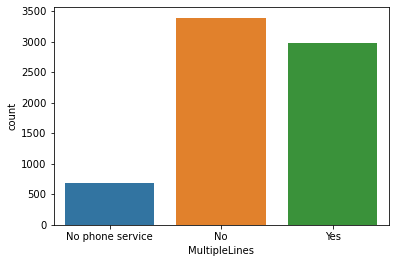

In [25]:
ax = sns.countplot(x="MultipleLines", data=data_visualization_nominal)
print(data_visualization_nominal["MultipleLines"].value_counts())

In [26]:
ax = sns.countplot(x="InternetService", data=data_visualization_nominal)
print(data_visualization_nominal["InternetService"].value_counts())

ValueError: Could not interpret input 'InternetService'

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


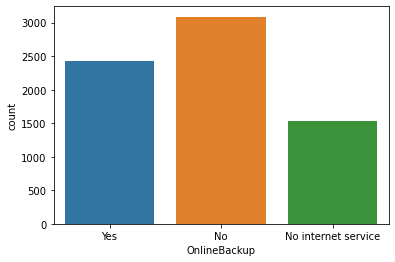

In [27]:
ax = sns.countplot(x="OnlineBackup", data=data_visualization_nominal)
print(data_visualization_nominal["OnlineBackup"].value_counts())

For the ordinal Categorical data we will use lineplot as it will give the flow of the line of the classes of the columns:

**Making dataframe of the ordinal data**

In [28]:
data_visualization_ordinal = data[["customerID","tenure"]].copy()

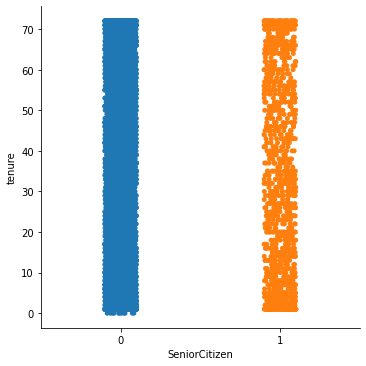

In [29]:
sns.catplot(x="SeniorCitizen", y="tenure", data=data)

#### Cheecking the distribution of the continuous value of the float type columns

In [30]:
data_visualization_continuous = data[["MonthlyCharges", "TotalCharges"]].copy()

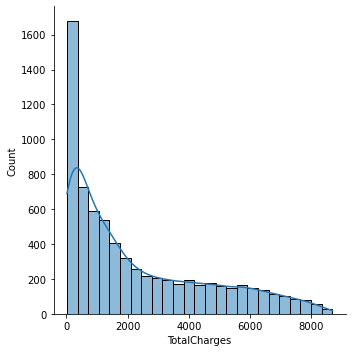

In [31]:
import seaborn as sns
sns.displot(data_visualization_continuous['TotalCharges'], kde=True)

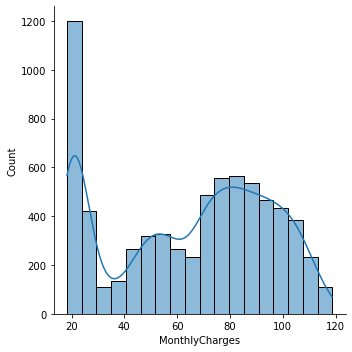

In [32]:
sns.displot(data_visualization_continuous['MonthlyCharges'], kde=True)

Visualization part is completed

Since the dataset has a lot of string values. We will use the rncoding techniques to convert the string data to numerical one

#### Encoding of DataFrame

In [33]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [34]:
for i in data.columns:
    if data[i].dtypes =="object":
        data[i] = enc.fit_transform(data[i].values.reshape(-1,1))

#### Describe the dataset

In [35]:
data.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,...,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,0.265370
std,2033.283305,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,...,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.000258,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,3521.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1400.550000,0.000000
75%,5281.500000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


<AxesSubplot:>

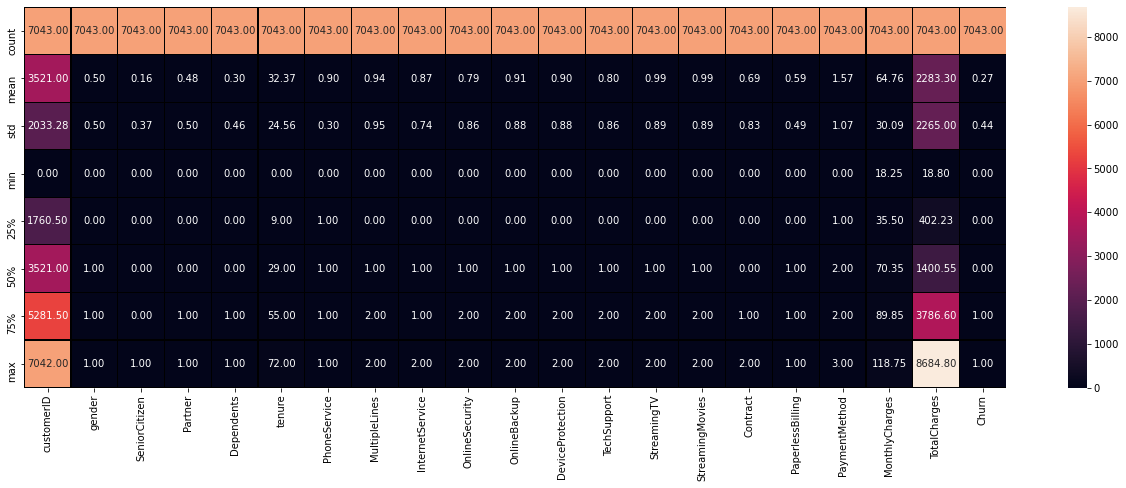

In [36]:
plt.figure(figsize=[22,7])
sns.heatmap(data.describe(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

#### Correlation of the columns with the target columns

In [37]:
data.corr()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.006288,-0.002074,-0.026729,-0.012823,0.008035,-0.006483,0.004316,-0.012407,0.013292,...,-0.006918,0.001140,-0.007777,-0.016746,0.015028,-0.001945,0.011604,-0.003916,-0.000270,-0.017447
gender,0.006288,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,...,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.002074,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,...,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102395,0.150889
Partner,-0.026729,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,...,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318812,-0.150448
Dependents,-0.012823,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,...,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.064535,-0.164221
tenure,0.008035,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,...,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.824757,-0.352229
PhoneService,-0.006483,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,...,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.112851,0.011942
MultipleLines,0.004316,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,...,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452883,0.038037
InternetService,-0.012407,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,...,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175429,-0.047291
OnlineSecurity,0.013292,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,...,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.254308,-0.289309


<AxesSubplot:>

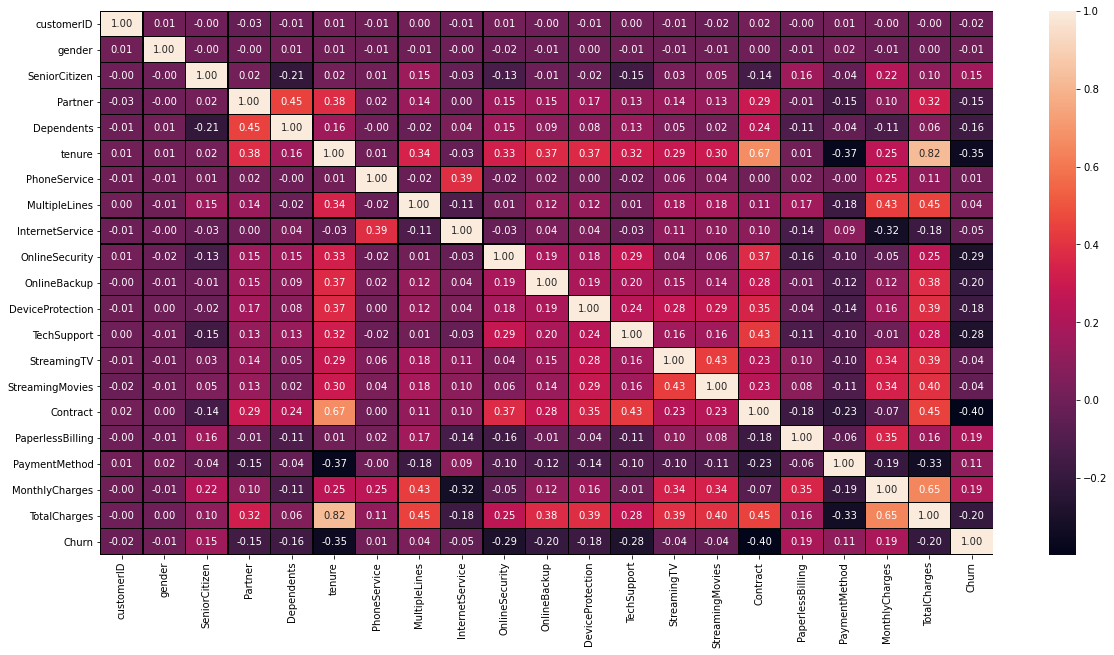

In [38]:
plt.figure(figsize=[20,10])
sns.heatmap(data.corr(),annot=True,linewidths=0.2,linecolor='black',fmt='0.2f')

Checking the columns which are positively and negatively correlated with the target columns

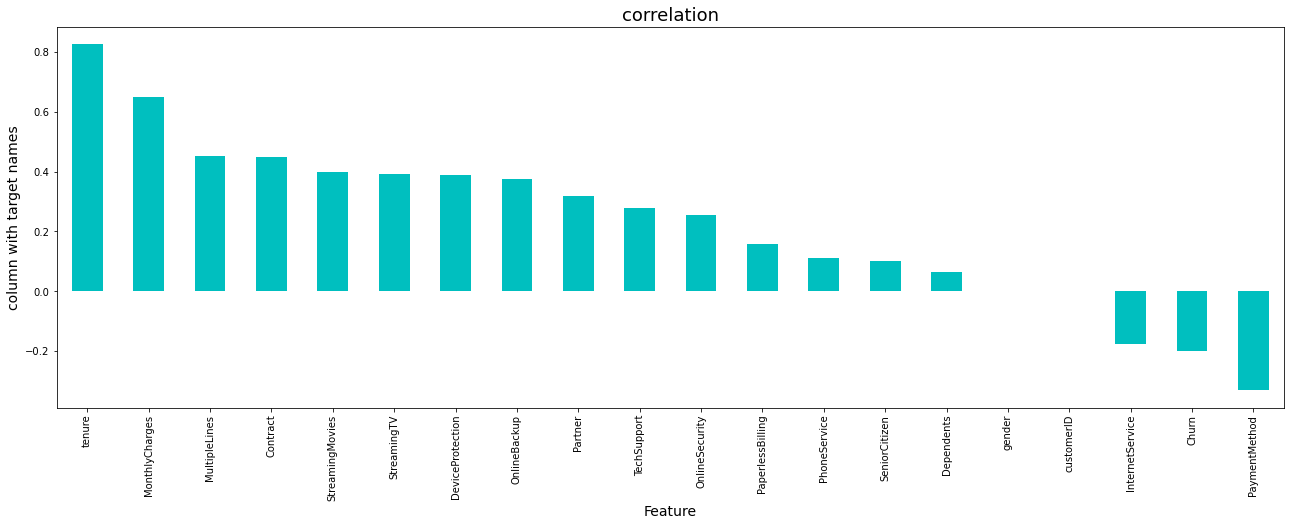

In [39]:
plt.figure(figsize = (22,7))
data.corr()['TotalCharges'].sort_values(ascending=False).drop(['TotalCharges']).plot(kind='bar',color = 'c')
plt.xlabel('Feature',fontsize =14)
plt.ylabel('column with target names', fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [40]:
data.skew()

customerID          0.000000
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
Churn               1.063031
dtype: float64

Keeping +/- 0.5 as the range for skewness, here are the columns which does not lie within this range.

* Senior Citizen - Cetegorical
* Dependents - categorical
* Phone Service - Categorical
* Contract - Categorical
* Total Charges - target variable
* Churn - Categorical

Since, no column has skewness, we will not treat that

#### Outliers Check:

In [41]:
data.dtypes

customerID          float64
gender              float64
SeniorCitizen         int64
Partner             float64
Dependents          float64
tenure                int64
PhoneService        float64
MultipleLines       float64
InternetService     float64
OnlineSecurity      float64
OnlineBackup        float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
StreamingMovies     float64
Contract            float64
PaperlessBilling    float64
PaymentMethod       float64
MonthlyCharges      float64
TotalCharges        float64
Churn               float64
dtype: object

Checking the outliers on the int and float type of columns

<AxesSubplot:>

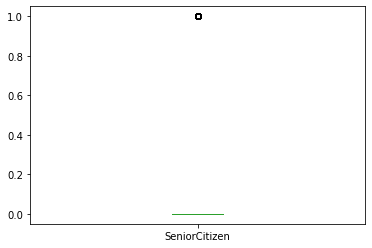

In [42]:
data['SeniorCitizen'].plot.box()

<AxesSubplot:>

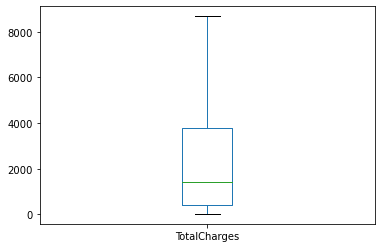

In [43]:
data['TotalCharges'].plot.box()

<AxesSubplot:>

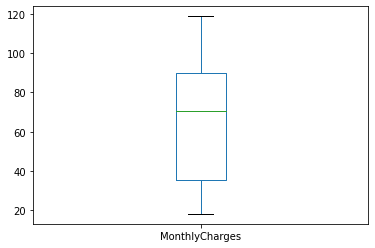

In [44]:
data['MonthlyCharges'].plot.box()

<AxesSubplot:>

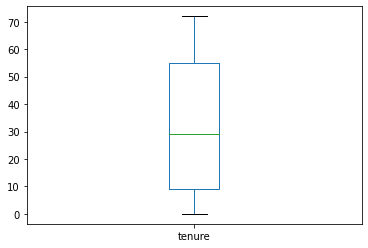

In [45]:
data['tenure'].plot.box()

In [46]:
data['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

Since the column Senior Citizen is nominal type, we cannot consider its data point as outlier.

#### Considering the outlier removal

In [47]:
data.shape

(7043, 21)

In [48]:
from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(data))
threshold=3
np.where(z>3)

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
         114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
         215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
         278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
         387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
         544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
         677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
         829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
         934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
        1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
        1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
        1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
        1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
        1614, 1620, 1634, 1637, 1652, 

In [49]:
data_new_z = data[(z<3).all(axis=1)]   # extract all the data point which have Z value less than 3 
data_new_z

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
5,6551.0,0.0,0,0.0,0.0,8,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,0.0,1.0,2.0,99.65,820.50,1.0
6,1002.0,1.0,0,0.0,1.0,22,1.0,2.0,1.0,0.0,...,0.0,0.0,2.0,0.0,0.0,1.0,1.0,89.10,1949.40,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,1758.0,0.0,0,0.0,0.0,72,1.0,0.0,2.0,1.0,...,1.0,1.0,1.0,1.0,2.0,1.0,0.0,21.15,1419.40,0.0
7038,4853.0,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0.0
7039,1525.0,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0.0
7041,5934.0,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


In [50]:
data_new_z.shape

(6361, 21)

In [51]:
Data_loss  = (7043-6361)/7043*100

In [52]:
Data_loss

9.683373562402386

Our data is becoming biased as it is not considering the case of Senior Citizens. Thus, we will not remove outliers.

#### Seperating the columns into features and target:

In [53]:
x = data.drop("TotalCharges", axis=1)
y = data["TotalCharges"]

In [54]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [55]:
for i in range(0,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2, random_state=i)
    lr.fit(x_train, y_train)
    pred_train=lr.predict(x_train)
    pred_test= lr.predict(x_test)
    print(f"At random state {i}, training accuracy is: {r2_score(y_train,pred_train)}")
    print(f"At random state {i}, testing accuracy is: {r2_score(y_test,pred_test)}")
    print("\n")

At random state 0, training accuracy is: 0.9058706722803965
At random state 0, testing accuracy is: 0.8977317673785853


At random state 1, training accuracy is: 0.9052277082152647
At random state 1, testing accuracy is: 0.9003132716690803


At random state 2, training accuracy is: 0.9056858398935237
At random state 2, testing accuracy is: 0.8984735750686543


At random state 3, training accuracy is: 0.9044956724241889
At random state 3, testing accuracy is: 0.9032713403489679


At random state 4, training accuracy is: 0.9031354749784841
At random state 4, testing accuracy is: 0.9085937883962479


At random state 5, training accuracy is: 0.9026338340566922
At random state 5, testing accuracy is: 0.9101290251842342


At random state 6, training accuracy is: 0.9028087364691222
At random state 6, testing accuracy is: 0.9097783155230829


At random state 7, training accuracy is: 0.9030731852162728
At random state 7, testing accuracy is: 0.9090152662295625


At random state 8, training accu

In [56]:
lr.fit(x_train, y_train)

LinearRegression()

In [57]:
pred_test = lr.predict(x_test)
print(r2_score(y_test,pred_test))

0.907603041316329


#### Cross validation of the model:

In [58]:
Train_accuracy = r2_score(y_train, pred_train)
Test_accuracy = r2_score(y_test, pred_test)

from sklearn.model_selection import cross_val_score

for j in range(2,10):
    cv_score= cross_val_score(lr,x, y, cv=j)
    cv_mean = cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy for training is {Train_accuracy} and accuracy for the testing is",{Test_accuracy})
    print("\n")

At cross fold 2 the cv score is 0.9033382537767014 and accuracy for training is 0.9034341582897005 and accuracy for the testing is {0.907603041316329}


At cross fold 3 the cv score is 0.9037012261875313 and accuracy for training is 0.9034341582897005 and accuracy for the testing is {0.907603041316329}


At cross fold 4 the cv score is 0.9037044584134895 and accuracy for training is 0.9034341582897005 and accuracy for the testing is {0.907603041316329}


At cross fold 5 the cv score is 0.9036665825623267 and accuracy for training is 0.9034341582897005 and accuracy for the testing is {0.907603041316329}


At cross fold 6 the cv score is 0.903734902438936 and accuracy for training is 0.9034341582897005 and accuracy for the testing is {0.907603041316329}


At cross fold 7 the cv score is 0.9035677539347997 and accuracy for training is 0.9034341582897005 and accuracy for the testing is {0.907603041316329}


At cross fold 8 the cv score is 0.9035565941557735 and accuracy for training is 0.9

Since the number of folds doesnt have such impact on the accuracy and cv_score. So cv=5 is selected

Here, we have handled the problem of the overfitting and the underfitting by checking the training and testing score.

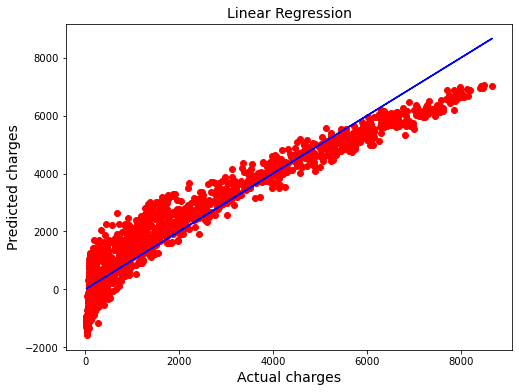

In [59]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8,6))
plt.scatter(x=y_test, y=pred_test,color='r')
plt.plot(y_test, y_test, color='b')
plt.xlabel('Actual charges', fontsize=14)
plt.ylabel('Predicted charges', fontsize=14)
plt.title('Linear Regression', fontsize=14)
plt.show()

#### Regularization:

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [61]:
from sklearn.linear_model import Lasso

parameters = {'alpha': [.0001,.001, .01, .1, 1, 10], 'random_state':list(range(0,10))}
ls = Lasso()
clf =GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [62]:
ls = Lasso(alpha = 1, random_state=0)
ls.fit(x_train, y_train)
ls.score(x_train, y_train)
pred_ls = ls.predict(x_test)

lss = r2_score(y_test, pred_ls)
lss

0.9076077287884543

In [63]:
cv_score = cross_val_score(ls, x, y, cv=5)
cv_mean = cv_score.mean()
cv_mean

0.9036629382160928

#### Ensemble technique:

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion': ['mse', 'mae'], 'max_features':['auto','sqrt','log2']}
rf = RandomForestRegressor()
clf = GridSearchCV(rf, parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [65]:
rf = RandomForestRegressor(criterion="mse", max_features="auto")
rf.fit(x_train, y_train)
rf.score(x_train, y_train)
pred_decision = rf.predict(x_test)

rfs = r2_score(y_test, pred_decision)
print('R2 Score:', rfs*100)

rfscore = cross_val_score(rf, x, y, cv=5)
rfc = rfscore.mean()
print('Cross val score:', rfc*100)


R2 Score: 99.88229860250006
Cross val score: 99.87279544572726


**We are getting model accuracy and cross validation both as 99.8% which shows our model is performing extremely well**

In [66]:
import pickle
filename = 'churn.pkl'
pickle.dump(rf, open(filename, 'wb'))

#### Conclusion

In [67]:
loaded_model = pickle.load(open('churn.pkl','rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.9988229860250006


In [68]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]], index=["predicted","original"])